In [129]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [130]:
path = 'hillary-clinton-emails/Emails.csv'
data = pd.read_csv(path, sep=',')

In [131]:
data.columns

Index(['Id', 'DocNumber', 'MetadataSubject', 'MetadataTo', 'MetadataFrom',
       'SenderPersonId', 'MetadataDateSent', 'MetadataDateReleased',
       'MetadataPdfLink', 'MetadataCaseNumber', 'MetadataDocumentClass',
       'ExtractedSubject', 'ExtractedTo', 'ExtractedFrom', 'ExtractedCc',
       'ExtractedDateSent', 'ExtractedCaseNumber', 'ExtractedDocNumber',
       'ExtractedDateReleased', 'ExtractedReleaseInPartOrFull',
       'ExtractedBodyText', 'RawText'],
      dtype='object')

In [132]:
def getRawText():
    subjectData = data[data.ExtractedSubject.notnull()].ExtractedSubject.astype(str)
    bodyData = data[data.ExtractedBodyText.notnull()].ExtractedBodyText.astype(str)
    rawText = ' '.join(subjectData) + ' ' + ' '.join(bodyData)
    rawText = rawText.replace('\n', ' ')
    return rawText

## 1. Generate a word cloud based on the raw corpus 

### 1.1 Word cloud without preprocessing

In [172]:
rawText = getRawText()

In [173]:
wordcloud = WordCloud().generate(rawText)

(-0.5, 399.5, 199.5, -0.5)

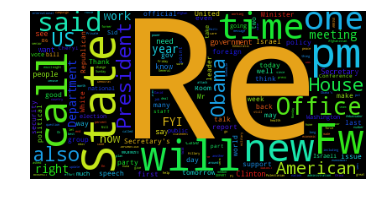

In [174]:
plt.imshow(wordcloud)
plt.axis("off")

### 1.2 Word cloud with preprocessing 

In [181]:
def filterStopWords(text):
    tokens = nltk.word_tokenize(text)
    stopWords = stopwords.words('english')
    customWords = ['re','fw','pm','am', 'also', '.', ',', '"', "'", '?', '&' 
                   '!', ':', ';', '(', ')', '[', ']', '{', '}', '@', '<', '>', '-', "n't"]
    stopWords += customWords
    filtered = list()
    for token in tokens:
        token = token.lower()
        if token not in stopWords:
            filtered.append(token)
    return filtered

#http://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html
def lemmAndStem(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in text]
    stemmer = nltk.SnowballStemmer("english", ignore_stopwords=True)
    stemmed = [stemmer.stem(lema) for lema in lemmatized]
    return stemmed

def preprocess(text):
    filtered = filterStopWords(text)
    processed = lemmAndStem(filtered)
    return ' '.join(processed)

In [182]:
procText = preprocess(rawText)

(-0.5, 399.5, 199.5, -0.5)

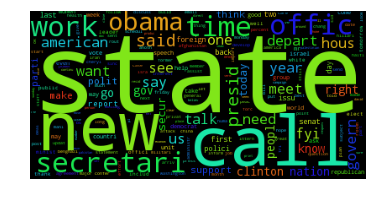

In [183]:
wordcloud = WordCloud().generate(procText)
plt.imshow(wordcloud)
plt.axis("off")

## 2. Sentiment Analysis

https://www.kaggle.com/operdeck/d/kaggle/hillary-clinton-emails/hillary-s-sentiment-about-countries